In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import randrange

In [2]:
def corrpts(imL, imR):
    orb = cv2.ORB_create()  

    kp = orb.detect(imL,None)
    keypoints1,descriptors1 = orb.compute(imL,kp)

    kp = orb.detect(imR,None)
    keypoints2,descriptors2 = orb.compute(imR,kp)

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(descriptors1,descriptors2)
    matches = sorted(matches, key = lambda x:x.distance)[0:50]

    list_kp1 = []
    list_kp2 = []
    x1_ = []
    x2_ = []
    y1_ = []
    y2_ = []

    for mat in matches:
        img1_idx = mat.queryIdx
        img2_idx = mat.trainIdx
        (x1, y1) = keypoints1[img1_idx].pt
        (x2, y2) = keypoints2[img2_idx].pt
        x1_.append(keypoints1[img1_idx].pt[0])
        x2_.append(keypoints2[img2_idx].pt[0]) 
        y1_.append(keypoints1[img1_idx].pt[1])
        y2_.append(keypoints2[img2_idx].pt[1])
        list_kp1.append([int(x1), int(y1)])
        list_kp2.append([int(x2), int(y2)])
    
    kp1 = np.array(list_kp1)
    kp2 = np.array(list_kp2)
    
    kp1 = np.float32(kp1[:, np.newaxis, :])
    kp2 = np.float32(kp2[:, np.newaxis, :])
    H, masked = cv2.findHomography(kp1, kp2, cv2.RANSAC, 5.0)
    
    return kp1,kp2,x1_,x2_,y1_,y2_,H,masked

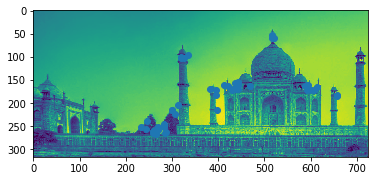

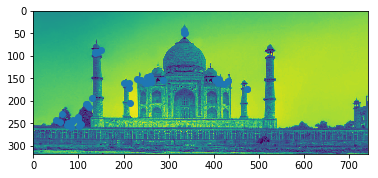

In [6]:
imgL = cv2.imread('image_mosaicing/img2_1.png',0)
imgR = cv2.imread('image_mosaicing/img2_2.png',0)
imgL1 = cv2.imread('image_mosaicing/img2_1.png')
imgR1 = cv2.imread('image_mosaicing/img2_2.png')
r0,r1,r2,r3,r4,r5,r6,r7 = corrpts(imgL, imgR)
plt.imshow(imgL)
plt.scatter(r2,r4)
plt.show()
plt.imshow(imgR)
plt.scatter(r3,r5)
plt.show()

In [7]:
H, masked = cv2.findHomography(r1, r0, cv2.RANSAC, 5.0)

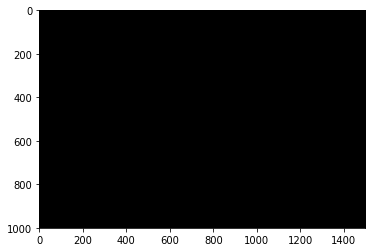

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


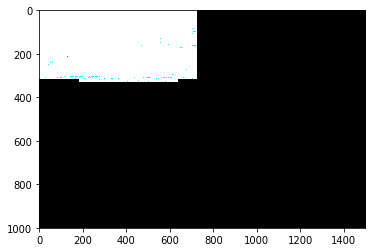

In [8]:
img = np.zeros((1000,1500,3))
plt.imshow(img)
plt.show()

for i in range(0,imgL1.shape[0]):
    for j in range(0,imgL1.shape[1]):
        if img[i][j][0]==0 and img[i][j][1]==0 and img[i][j][2]==0:
            img[i][j] = imgL1[i][j]

dst = cv2.warpPerspective(imgR1,H,(imgR1.shape[0]*2, imgR1.shape[0]*2))

for i in range(0,dst.shape[0]):
    for j in range(0,dst.shape[1]):
        if img[i][j][0]==0 and img[i][j][1]==0 and img[i][j][2]==0:
            img[i][j]=dst[i][j]
            
dst = cv2.warpPerspective(imgR1,H,(imgR1.shape[0]*2, imgR1.shape[0]*2))

for i in range(0,dst.shape[0]):
    for j in range(0,dst.shape[1]):
        if img[i][j][0]==0 and img[i][j][1]==0 and img[i][j][2]==0:
            img[i][j]=dst[i][j]
    
plt.imshow(img)
plt.show()
